<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM461/Hydrogen_radial_wavefunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Radial Wavefunctions of the Hydrogen Atom
$$\hat{H}\psi=E\psi=ER(r)\Theta(\theta)\Phi(\phi)=ER(r)Y_l^{m_l}(\theta,\phi)$$

The solution to the Schrödinger equation for the hydrogen atom gives results that include the spherical harmonics for the angular portion and a radial (depending on $r$) portion.
We have already explored the angular portion of this problem in the particle on a sphere or diatomic rigid rotor problem. We'll come back to that problem in the context of angular momentum later. But the new part of the hydrogen atom solutions is the radial wavefunction.

The solution to the radial part of the hydrogen atom problem gives us $$R(r)=\sqrt{\dfrac{2Z}{nr}}^3\sqrt{\dfrac{(n-l-1)!}{2n[(n+l)!]^3}}\left(\dfrac{2Zr}{na_0}\right)^le^{-r/na_0}L_{n+l}^{2l+1}\left(\dfrac{2Zr}{na_0}\right)$$
where $a_0=\dfrac{4\pi \epsilon_0\hbar}{\pi m_e e^2}$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import genlaguerre
from scipy.integrate import quad


In [3]:
# Define constants
Z = 1  # Atomic number for hydrogen
a0 = 1  # Bohr radius - assume atomic units

The first two terms in the equation for $R$ are the normalization factor. I couldn't make them work right

In [4]:
# Define the radial wavefunction formula
def radial_wavefunction(r, n, l):
    #prefactor = math.sqrt(((2*Z/n/a0)**3) * math.factorial(n-l-1) / (2*n*(math.factorial(n+l))))
    exponential_term = np.exp(-Z*r/n/a0)
    r_term=(2*Z*r/n/a0)**l
    laguerre_term = genlaguerre(n-l-1, 2*l+1)(2*Z*r/n/a0) # use the laguerre polynomials from scipy
    return  r_term * exponential_term * laguerre_term
    # the wavefunction is a normalization factor, an exponential, an r**l term, and a Laguerre polynomial.

def compute_normalization_factor(n, l):
    # Define the integrand for computing the normalization factor
    integrand = lambda r: np.abs(radial_wavefunction(r, n, l))**2
    # Compute the normalization factor
    N, _ = quad(integrand, 0, np.inf)
    return np.sqrt(1 / N)  # Take the square root and inverse

# Define a function to return the normalized radial wavefunction
def normalized_rwf(r, n, l):
    # Compute the normalization factor
    N = compute_normalization_factor(n, l)
    # Compute the normalized radial wavefunction
    return radial_wavefunction(r, n, l) * N



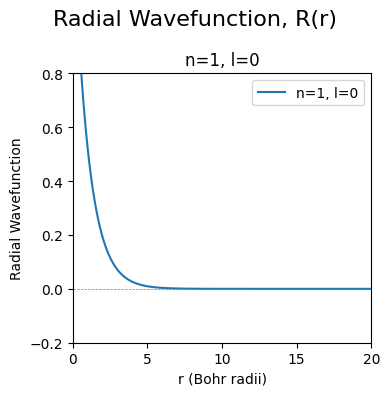

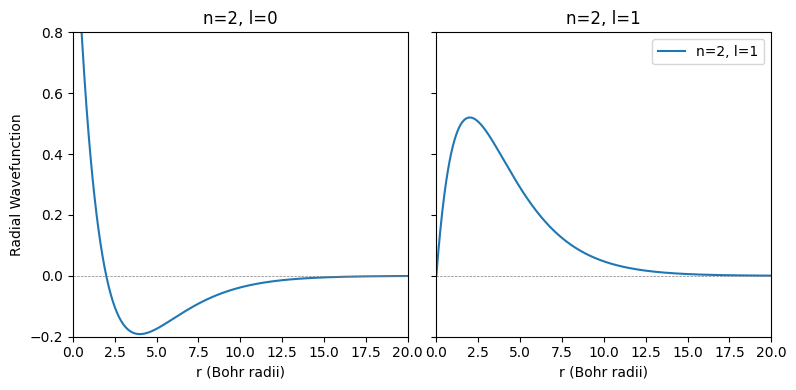

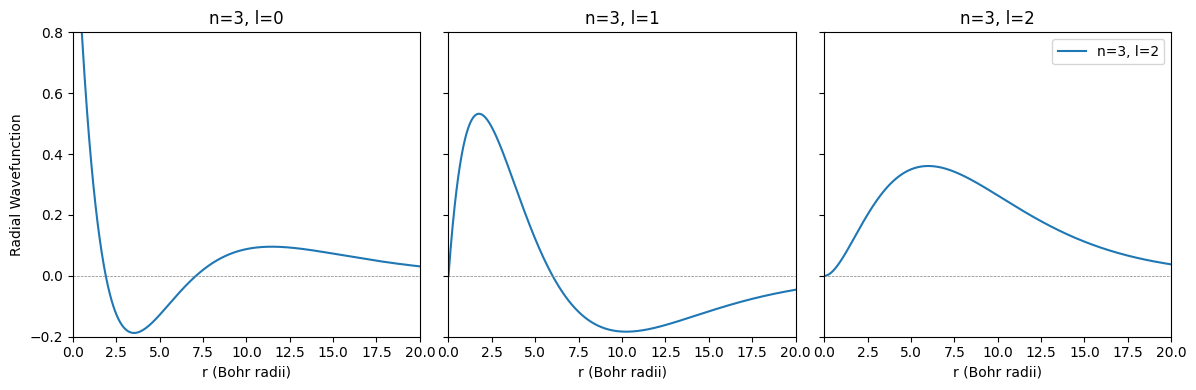

In [5]:
# Plot several wavefunctions

# Define range of r values
r_values = np.linspace(0, 20*a0, 1000) # from 0 to 20 bohr radii

# Plot radial wavefunctions for different n values
for n in range(1, 4):
    num_plots = n
    fig, axs = plt.subplots(1, num_plots, figsize=(12/3*num_plots, 4))
    for l in range(n):
        ax = axs[l] if n > 1 else axs
        ax.plot(r_values, normalized_rwf(r_values, n, l), label=f"n={n}, l={l}")
        ax.set_title(f"n={n}, l={l}")
        ax.set_xlabel("r (Bohr radii)")
        if l==0:
          ax.set_ylabel("Radial Wavefunction") # y-axis label only on far left plots
        else:
          ax.set_yticklabels([])
        ax.set_xlim(0, 20)  # Set x-axis limits
        ax.set_ylim(-0.2, .8)  # Set y-axis limits
        ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0
    if n==1:
      plt.suptitle('Radial Wavefunction, R(r)', fontsize=16)
    fig.tight_layout()
    plt.legend()
    plt.show()


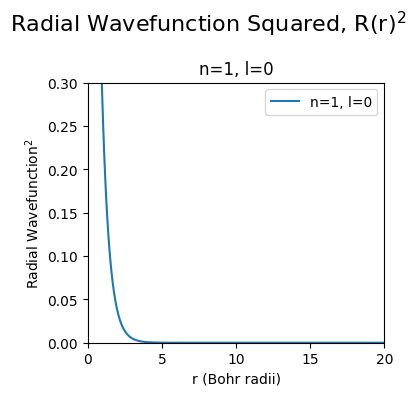

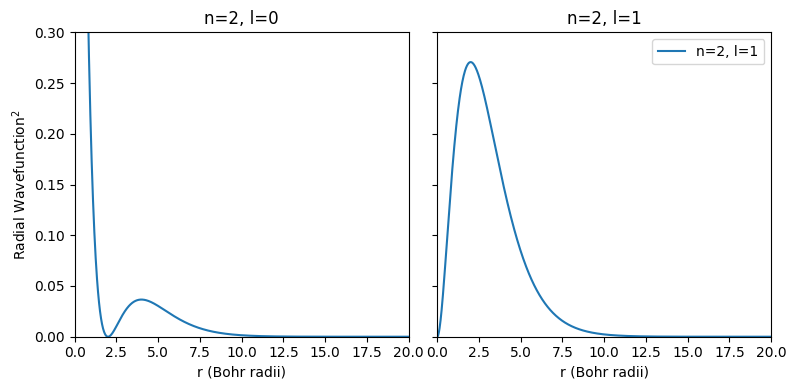

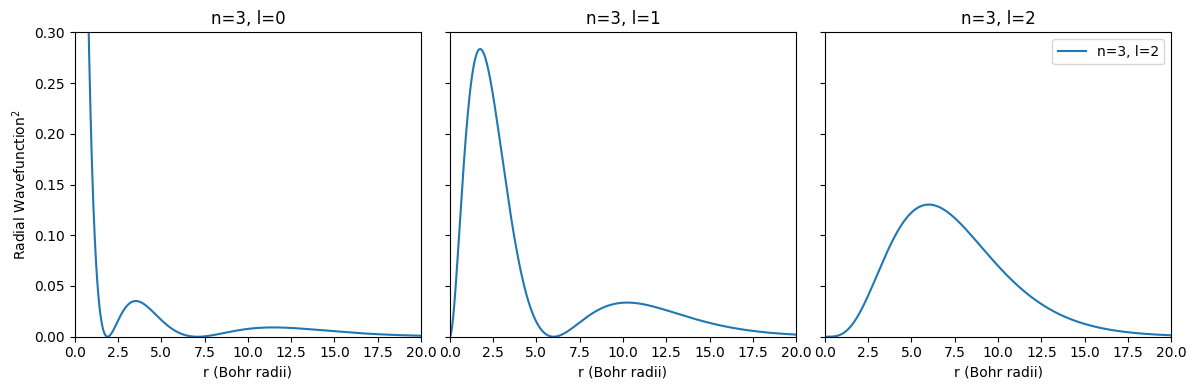

In [6]:
# Define range of r values
r_values = np.linspace(0, 20*a0, 1000) # from 0 to 20 bohr radii

# Plot radial wavefunctions for different n values
for n in range(1, 4):
    num_plots = n
    fig, axs = plt.subplots(1, num_plots, figsize=(12/3*num_plots, 4))
    for l in range(n):
        ax = axs[l] if n > 1 else axs
        ax.plot(r_values, np.abs(normalized_rwf(r_values, n, l))**2, label=f"n={n}, l={l}")
        ax.set_title(f"n={n}, l={l}")
        ax.set_xlabel("r (Bohr radii)")
        if l==0:
          ax.set_ylabel("Radial Wavefunction$^2$") # y-axis label only on far left plots
        else:
          ax.set_yticklabels([])
        ax.set_xlim(0, 20)  # Set x-axis limits
        ax.set_ylim(-0.0, .3)  # Set y-axis limits
        ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0
    if n==1:
      plt.suptitle('Radial Wavefunction Squared, R(r)$^2$', fontsize=16)
    fig.tight_layout()
    plt.legend()
    plt.show()

#Radial Distribution Function
The wavefunction squared gives the probability as a function of position from the nucleus. However, that probability can be misleading. This is not due to any problem with the idea of squaring a wavefunction to get at probability. But we need to consider just what calculating the wavefunction squared as a function of distance from the nucleus is leaving out. It is true that the probability of an electron being near the nucleus in an $s$ orbital is high and the probability of the electron being at a particular point 50 pm away is much smaller. It is, however, true that there is only one nucleus but there are many points 50 pm away from the nucleus so that just probing the probability on a line extending away from the nucleus is overestimating the probability near the nucleus and underestimating the probability away from it.

The radial distribution function (rdf) gives an alternative picture of the probability. It is obtained by changing our probe of the probability from an infinitessimal distance interval along the line extending from the nucleus to an infinitessimally thin spherical shell of various radii. The volume of such a shell is $4\pi r^2$. The $4 \pi$ is sometimes ignored (and we can simply normalize the rdf to include it) such that the radial distribution function is defined as $r^2R(r)^2$.

Let's plot that for $n$=1, 2, and 3.

In [7]:
def compute_normalization_factor_rdf(n, l):
    # Define the integrand for computing the normalization factor
    integrand = lambda r: np.abs(radial_wavefunction(r, n, l))**2*r**2
    # Compute the normalization factor
    N, _ = quad(integrand, 0, np.inf)
    return np.sqrt(1 / N)  # Take the square root and inverse

# Define a function to return the normalized radial wavefunction
def normalized_rdf(r, n, l):
    # Compute the normalization factor
    N = compute_normalization_factor_rdf(n, l)
    # Compute the normalized radial wavefunction
    return radial_wavefunction(r, n, l)**2*r**2 * N**2

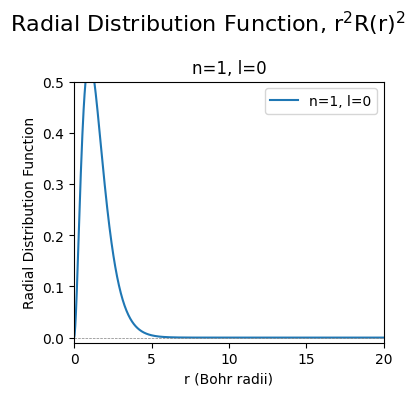

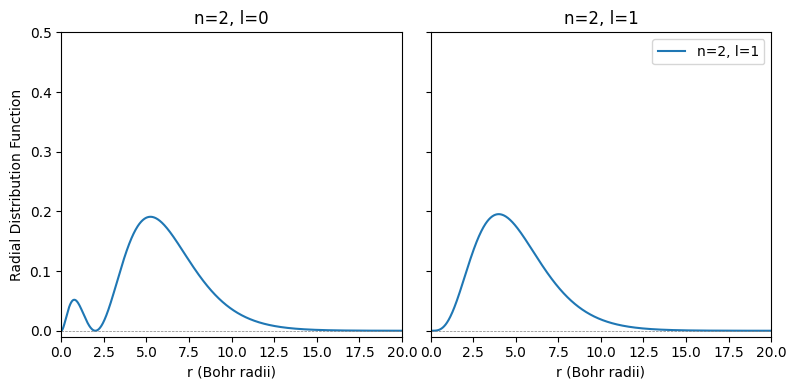

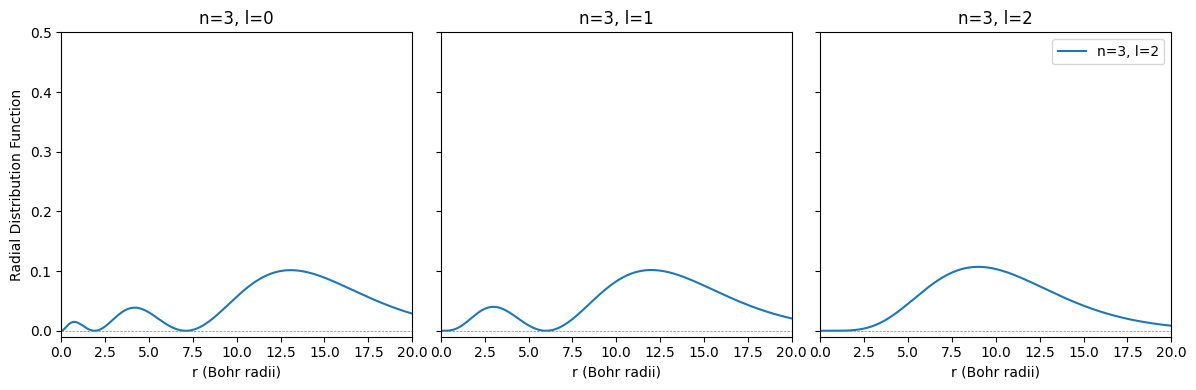

In [8]:
# Plot radial distribution functions for different n values
for n in range(1, 4):
    num_plots = n
    fig, axs = plt.subplots(1, num_plots, figsize=(4*num_plots, 4),sharey=True)
    for l in range(n):
        ax = axs[l] if n > 1 else axs
        ax.plot(r_values, normalized_rdf(r_values, n, l), label=f"n={n}, l={l}")
        if l==0:
          ax.set_ylabel("Radial Distribution Function")
        ax.set_title(f"n={n}, l={l}")
        ax.set_xlabel("r (Bohr radii)")
        ax.set_xlim(0, 20)  # Set x-axis limits
        ax.set_ylim(-0.01,.5)  # Set y-axis limits
        ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0
    if n==1:
      plt.suptitle('Radial Distribution Function, r$^2$R(r)$^2$', fontsize=16)
    fig.tight_layout()
    plt.savefig('rdf.png')
    plt.legend()
    plt.show()

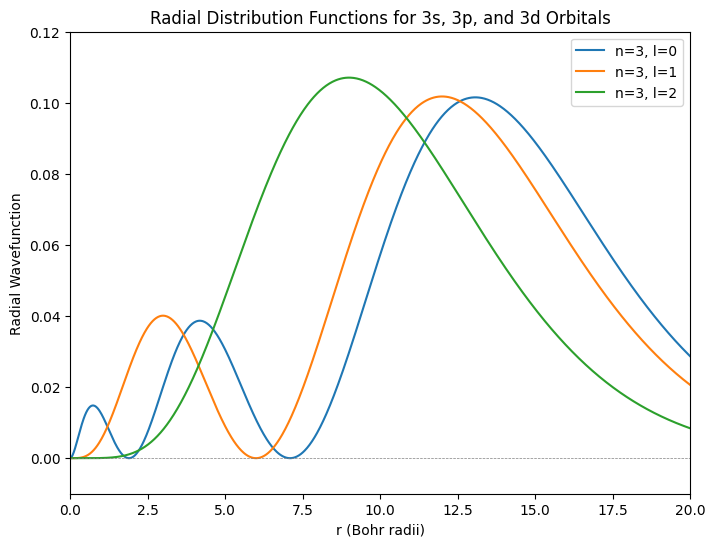

In [9]:
# Define constants
Z = 1  # Atomic number for hydrogen
a0 = 1  # Bohr radius

# Define range of r values
r_values = np.linspace(0, 20*a0, 1000)

# Plot radial wavefunctions for different n values
fig, ax = plt.subplots(figsize=(8, 6))
for l in range(3):
    n = 3
    ax.plot(r_values, normalized_rdf(r_values, n, l), label=f"n={n}, l={l}")
ax.set_title("Radial Distribution Functions for 3s, 3p, and 3d Orbitals")
ax.set_xlabel("r (Bohr radii)")
ax.set_ylabel("Radial Wavefunction")
ax.set_xlim(0, 20)  # Set x-axis limits
ax.set_ylim(-0.01, 0.12)  # Set y-axis limits
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Add horizontal line at y=0
plt.legend()
plt.show()

#The RDF and Average Distance and the Shell Model
We can use the radial distribution function to calculate the average distance of the electron from the nucleus just as we could with a regular wavefunction. Let's do this for the orbitals of $n$=1, 2, and 3.

In [11]:
from scipy.integrate import quad

# Define constants
Z = 1  # Atomic number for hydrogen
a0 = 1  # Bohr radius

# Define function to calculate average Bohr radius
def average_bohr_radius(n, l):
    integrand = lambda r: r*normalized_rdf(r, n, l)
    result, _ = quad(integrand, 0, np.inf)
    return result
# Calculate and print average Bohr radius for each orbital
for n in range(1, 4):
    for l in range(n):
        average_r = average_bohr_radius(n, l)
        print(f"Average Bohr radius for n={n}, l={l}: {average_r:.2f} Bohr radii")



Average Bohr radius for n=1, l=0: 1.50 Bohr radii
Average Bohr radius for n=2, l=0: 6.00 Bohr radii
Average Bohr radius for n=2, l=1: 5.00 Bohr radii
Average Bohr radius for n=3, l=0: 13.50 Bohr radii
Average Bohr radius for n=3, l=1: 12.50 Bohr radii
Average Bohr radius for n=3, l=2: 10.50 Bohr radii


What do you notice about the average distances overall and for subshells within the same shell?

We can also just find the maxima of the rdf to give a *most probable distance* (or, for $l>0$, more than one *most probable distance*).

Note the most probable distance for a $1s$ orbital is exactly 1 Bohr radius. In other words, the distance calculated using the solution to the Schrödinger equation is the same as that calculated by Niels Bohr using his earlier model.

Also, take note of how the distance changes for each initial maxima for similar subshells.

In [13]:
from scipy.signal import find_peaks

# Define constants
Z = 1  # Atomic number for hydrogen
a0 = 1  # Bohr radius

# Define function for r^2 * |R_{nl}(r)|^2
def radial_distribution_function(n, l):
    return lambda r: r**2 * radial_wavefunction(r, n, l)**2

# Find the first maximum of r^2 * |R_{nl}(r)|^2 for specified orbitals
orbitals = [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2)]
for n, l in orbitals:
    # Define range of r values
    r_values = np.linspace(0.001, 40, 10000)
    # Find peaks
    peaks, _ = find_peaks(normalized_rdf(r_values,n,l))
    peak_locations = r_values[peaks]
    # Print the locations of all peaks
    print(f"For the {n}{['s', 'p', 'd'][l]} orbital, the maxima of the radial distribution function occur at:")
    for i, peak_location in enumerate(peak_locations):
        print(f"- Peak {i+1}: r = {peak_location:.2f} Bohr radii")



For the 1s orbital, the maxima of the radial distribution function occur at:
- Peak 1: r = 1.00 Bohr radii
For the 2s orbital, the maxima of the radial distribution function occur at:
- Peak 1: r = 0.77 Bohr radii
- Peak 2: r = 5.24 Bohr radii
For the 2p orbital, the maxima of the radial distribution function occur at:
- Peak 1: r = 4.00 Bohr radii
For the 3s orbital, the maxima of the radial distribution function occur at:
- Peak 1: r = 0.74 Bohr radii
- Peak 2: r = 4.19 Bohr radii
- Peak 3: r = 13.07 Bohr radii
For the 3p orbital, the maxima of the radial distribution function occur at:
- Peak 1: r = 3.00 Bohr radii
- Peak 2: r = 12.00 Bohr radii
For the 3d orbital, the maxima of the radial distribution function occur at:
- Peak 1: r = 9.00 Bohr radii
